In [ ]:
############################## Read Data ####################################

# Pandas is used for data manipulation
import pandas as pd
# upload data


features = pd.read_excel('Alldata236.xlsx')

features= features.drop('Unnamed: 0', axis = 1)



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
features

,Tm,Si,Fe,Cu,Mn,Mg,Cr,Ni,Zn,Ti,...,alloy name,resistance to general corrosion,resistance to stress corrosion cracking,cold workability,machinability,brazeability,gas weldability,arc weldability,resistance and spot weldability,extrudability
0,H25,0.0,0.0,0.0,0.0,0.8,0.0,0.0,0.0,0.0,...,5657.0,Excellent,Very Good,Very Good,Borderline,Borderline,Excellent,Excellent,Excellent,Very Good
1,H28,0.0,0.0,0.0,0.0,0.8,0.0,0.0,0.0,0.0,...,5657.0,Excellent,Excellent,Fair,Borderline,Borderline,Excellent,Excellent,Excellent,Very Good
2,H32,0.0,0.0,0.0,0.0,0.8,0.0,0.0,0.0,0.0,...,5005.0,Excellent,Excellent,Excellent,Borderline,Very Good,Excellent,Excellent,Excellent,Very Good
3,H34,0.0,0.0,0.0,0.0,0.8,0.0,0.0,0.0,0.0,...,5005.0,Excellent,Excellent,Very Good,Borderline,Very Good,Excellent,Excellent,Excellent,Very Good
4,H36,0.0,0.0,0.0,0.0,0.8,0.0,0.0,0.0,0.0,...,5005.0,Excellent,Excellent,Fair,Borderline,Very Good,Excellent,Excellent,Excellent,Very Good
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
231,O,1.4,0.0,1.0,0.8,1.1,0.0,0.0,0.0,0.0,...,6066.0,Fair,Excellent,Very Good,Borderline,Borderline,Borderline,Very Good,Very Good,Very Good
232,T4,1.4,0.0,1.0,0.8,1.1,0.0,0.0,0.0,0.0,...,6066.0,Fair,Very Good,Fair,Fair,Borderline,Borderline,Very Good,Very Good,Very Good
233,T6,1.4,0.0,1.0,0.8,1.1,0.0,0.0,0.0,0.0,...,6066.0,Fair,Very Good,Fair,Very Good,Borderline,Borderline,Very Good,Very Good,Very Good
234,T6,12.2,0.0,0.9,0.0,1.1,0.0,0.9,0.0,0.0,...,4032.0,Fair,Very Good,Fair,Very Good,Borderline,Borderline,Very Good,Fair,Excellent


In [ ]:
########################### Defining label ##################################
import numpy as np

################ Mechanical properties ########################################

##Labels are the values we want to predict
label1 = np.array(features['UTS'])
label2 = np.array(features['TYS'])
label3 = np.array(features['Elong'])
label4 = np.array(features['BHN'])
label5 = np.array(features['Shear'])
label6 = np.array(features['Endurance'])

####################### Technological Properties ###############################
# features = features.replace('Borderline [3]', 'Borderline')
# features = features.replace('Fair [3]', 'Fair')
# features = features.replace('Excellent [3]', 'Excellent')
# features = features.replace('Very Good [3]', 'Very Good')
# features = features.replace('Unacceptable or Not Commericially Practical', 'Unacceptable')
# ##Labels are the values we want to predict
# label1 = np.array(features['resistance to general corrosion'])
# label2 = np.array(features['resistance to stress corrosion cracking'])
# label3 = np.array(features['cold workability'])
# label4 = np.array(features['machinability'])
# label5 = np.array(features['brazeability'])
# label6 = np.array(features['gas weldability'])
# label7 = np.array(features['arc weldability'])
# label8 = np.array(features['resistance and spot weldability'])
# label9 = np.array(features['extrudability'])

In [ ]:
#### trimming features
# Remove the labels from the features
# axis 1 refers to the columns
features= features.drop('UTS', axis = 1)
features= features.drop('TYS', axis = 1)
features= features.drop('Elong', axis = 1)
features= features.drop('BHN', axis = 1)
features= features.drop('Shear', axis = 1)
features= features.drop('Endurance', axis = 1)


features= features.drop('alloy name', axis = 1)


features= features.drop('resistance to general corrosion', axis = 1)
features= features.drop('resistance to stress corrosion cracking', axis = 1)
features= features.drop('cold workability', axis = 1)
features= features.drop('machinability', axis = 1)
features= features.drop('brazeability', axis = 1)
features= features.drop('gas weldability', axis = 1)
features= features.drop('arc weldability', axis = 1)
features= features.drop('resistance and spot weldability', axis = 1)
features= features.drop('extrudability', axis = 1)

n_samples, n_features = features.shape
# One-hot encode categorical features
features = pd.get_dummies(features,prefix='', prefix_sep='')
features.head(5)

# Saving feature names for later use
feature_list = list(features.columns)

# Convert to numpy array
features = np.array(features)
# n_samples, n_features = features.shape

In [ ]:
################### split test and train sets ###############################
from sklearn.model_selection import train_test_split
test_ratio = 0.002 ### includig 1 sample for test (similar to LOOCV)
SEED = 1
train_features1, test_features1, train_labels1, test_labels1 = train_test_split(features, label1,
                                                                            test_size = test_ratio,
                                                                            random_state = SEED)


train_features2, test_features2, train_labels2, test_labels2 = train_test_split(features, label2,
                                                                            test_size = test_ratio,
                                                                            random_state = SEED)


train_features3, test_features3, train_labels3, test_labels3 = train_test_split(features, label3,
                                                                            test_size = test_ratio,
                                                                            random_state = SEED)


train_features4, test_features4, train_labels4, test_labels4 = train_test_split(features, label4,
                                                                            test_size = test_ratio,
                                                                            random_state = SEED)


train_features5, test_features5, train_labels5, test_labels5 = train_test_split(features, label5,
                                                                            test_size = test_ratio,
                                                                            random_state = SEED)


train_features6, test_features6, train_labels6, test_labels6 = train_test_split(features, label6,
                                                                            test_size = test_ratio,
                                                                            random_state = SEED)


train_features7, test_features7, train_labels7, test_labels7 = train_test_split(features, label7,
                                                                            test_size = test_ratio,
                                                                            random_state = SEED)


# train_features8, test_features8, train_labels8, test_labels8 = train_test_split(features, label8,
#                                                                               test_size = test_ratio,
#                                                                               random_state = SEED)
# train_features9, test_features9, train_labels9, test_labels9 = train_test_split(features, label9,
#                                                                               test_size = test_ratio,
#                                                                               random_state = SEED)






In [ ]:
##################  build RF Model ######################################
################################################################################
SEED = 100
######################## Regression: mechanical ################################
from sklearn.ensemble import RandomForestRegressor

Model1 = RandomForestRegressor(random_state=SEED)
Model2 = RandomForestRegressor(random_state=SEED)
Model3 = RandomForestRegressor(random_state=SEED)
Model4 = RandomForestRegressor(random_state=SEED)
Model5 = RandomForestRegressor(random_state=SEED)
Model6 = RandomForestRegressor(random_state=SEED)
Model7 = RandomForestRegressor(random_state=SEED)

######################## Classification : technological ################################
# from sklearn.ensemble import RandomForestClassifier

# Model1 = RandomForestClassifier(random_state=SEED)
# Model2 = RandomForestClassifier(random_state=SEED)
# Model3 = RandomForestClassifier(random_state=SEED)
# Model4 = RandomForestClassifier(random_state=SEED)
# Model5 = RandomForestClassifier(random_state=SEED)
# Model6 = RandomForestClassifier(random_state=SEED)
# Model7 = RandomForestClassifier(random_state=SEED)
# Model8 = RandomForestClassifier(random_state=SEED)
# Model9 = RandomForestClassifier(random_state=SEED)


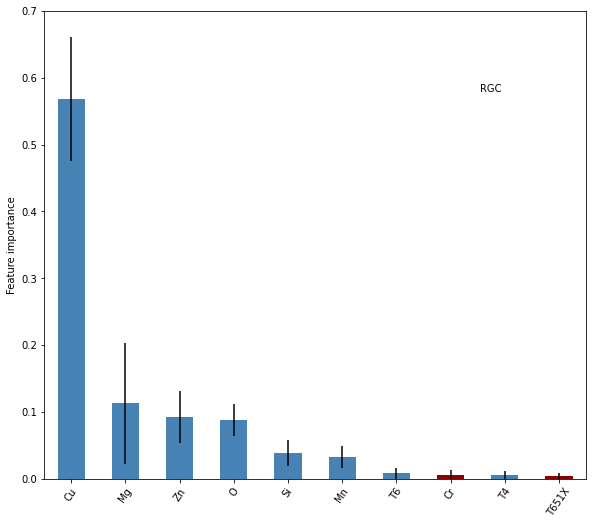

In [ ]:
from IPython.core.pylabtools import figsize
##### feature importance Random Forest
import matplotlib.pyplot as plt
from matplotlib.pyplot import title


######## 1      UTS/RGC
model = Model1
train_features = pd.DataFrame(train_features1, columns=feature_list)
train_labels = train_labels1
 
model.fit(train_features,train_labels)
# print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
importances = model.feature_importances_
std_importances = np.std([tree.feature_importances_ for tree in model.estimators_], axis=0)
std_importances = pd.Series(std_importances)
top_std = np.array(std_importances.nlargest(10))


feat_importances = pd.Series(importances, index=train_features.columns)
topfeatures = feat_importances.nlargest(10)


fig, ax = plt.subplots(figsize=(9,8))
# fig, ax = plt.subplots(figsize=(12,8))
colors = ['steelblue','steelblue','steelblue','steelblue','steelblue','steelblue','steelblue','darkred','steelblue','darkred'] ### RGC
# colors = ['steelblue','steelblue','steelblue','darkred','steelblue','steelblue','darkred','steelblue','darkred','darkred'] ### UTS
topfeatures.plot.bar(yerr = top_std ,ax=ax, color = colors)

ax.set_ylabel('Feature importance')


# fig.text(0.8, 0.8, 'UTS', color='black', ha='center')
fig.text(0.8, 0.8, 'RGC', color='black', ha='center')

# fig.text(0.8, 0.8, 'UTS', color='black', ha='center',
#         bbox=dict(facecolor='none', edgecolor='black', boxstyle='round', pad=0.5)) # boxstyle='round,pad=1'

# fig.text(0.8, 0.8, 'RGC', color='black', ha='center',
#         bbox=dict(facecolor='none', edgecolor='black')) # boxstyle='round,pad=1'
plt.xticks(rotation=55)
plt.rcParams['font.size'] = '32'
# plt.rcParams['font.size'] = '37'
fig.tight_layout()

plt.ylim((0,0.7))

plt.show()


In [ ]:
FI_score_1 = pd.DataFrame(feat_importances)

In [ ]:
feat_list = pd.DataFrame(feature_list)
feat_list.to_excel(r'/content/drive/My Drive/Yasaman_projects/Materials_Research/Experiments/Outputs/feat_list.xlsx', index = True)

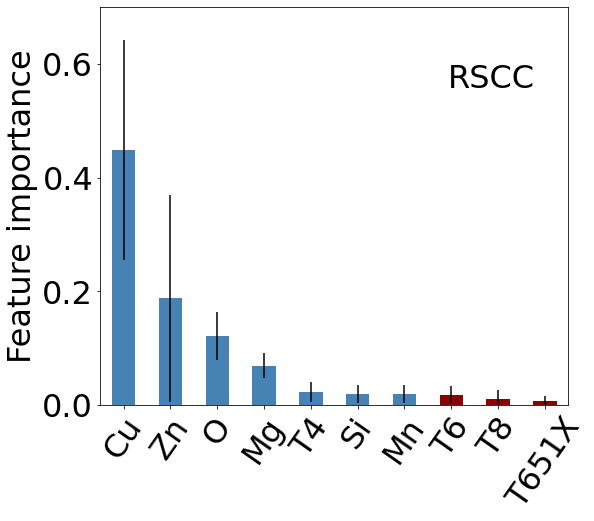

In [ ]:
######### 2     TYS/RSCC

model = Model2
train_features = pd.DataFrame(train_features2, columns=feature_list)
train_labels = train_labels2
 
model.fit(train_features,train_labels)
# print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization

importances = model.feature_importances_
std_importances = np.std([tree.feature_importances_ for tree in model.estimators_], axis=0)
std_importances = pd.Series(std_importances)
top_std = np.array(std_importances.nlargest(10))


feat_importances = pd.Series(importances, index=train_features.columns)
topfeatures = feat_importances.nlargest(10)

# fig, ax = plt.subplots(figsize=(12,8))
fig, ax = plt.subplots(figsize=(9,8))
colors = ['steelblue','steelblue','steelblue','steelblue','steelblue','steelblue','steelblue','darkred','darkred','darkred'] ### RSCC
# colors = ['steelblue','steelblue','darkred','steelblue','darkred','steelblue','steelblue','darkred','darkred','darkred'] ### TYS
topfeatures.plot.bar(yerr = top_std ,ax=ax, color = colors)

ax.set_ylabel('Feature importance')

fig.tight_layout()

fig.text(0.8, 0.8, 'RSCC', color='black', ha='center') 

# fig.text(0.8, 0.8, 'TYS', color='black', ha='center') 

plt.xticks(rotation=55)
plt.rcParams['font.size'] = '32'
# plt.rcParams['font.size'] = '37'
fig.tight_layout()

plt.ylim((0,0.7))

plt.show()

In [ ]:
FI_score_2 = pd.DataFrame(feat_importances)

(0.0, 0.7)

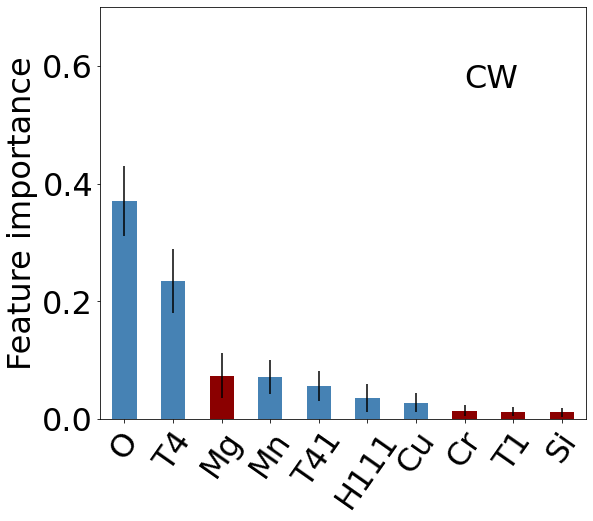

In [ ]:
######### 3     Elong/CW

model = Model3
train_features = pd.DataFrame(train_features3, columns=feature_list)
train_labels = train_labels3
 
model.fit(train_features,train_labels)
# print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization

importances = model.feature_importances_
std_importances = np.std([tree.feature_importances_ for tree in model.estimators_], axis=0)
std_importances = pd.Series(std_importances)
top_std = np.array(std_importances.nlargest(10))


feat_importances = pd.Series(importances, index=train_features.columns)
topfeatures = feat_importances.nlargest(10)


fig, ax = plt.subplots(figsize=(9,8))
colors = ['steelblue','steelblue','darkred','steelblue','steelblue','steelblue','steelblue','darkred','darkred','darkred'] ### CW
# colors = ['darkred','darkred','steelblue','steelblue','darkred','darkred','steelblue','steelblue','darkred','steelblue'] ### El
topfeatures.plot.bar(yerr = top_std ,ax=ax, color = colors)

ax.set_ylabel('Feature importance')

fig.tight_layout()

# fig.text(0.8, 0.8, 'El', color='black', ha='center') 
fig.text(0.8, 0.8, 'CW', color='black', ha='center') 



plt.xticks(rotation=55)
plt.rcParams['font.size'] = '32'
fig.tight_layout()

plt.ylim((0,0.7))

In [ ]:
FI_score_3 = pd.DataFrame(feat_importances)


(0.0, 0.7)

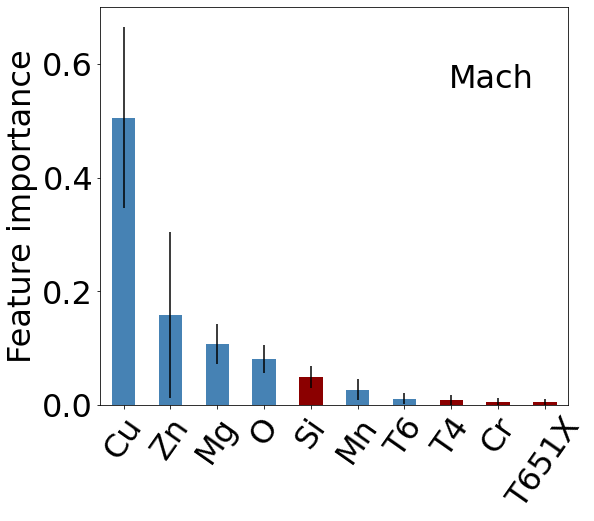

In [ ]:
######### 4     BHN/Mach

model = Model4
train_features = pd.DataFrame(train_features4, columns=feature_list)
train_labels = train_labels4
 
model.fit(train_features,train_labels)
# print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
importances = model.feature_importances_
std_importances = np.std([tree.feature_importances_ for tree in model.estimators_], axis=0)
std_importances = pd.Series(std_importances)
top_std = np.array(std_importances.nlargest(10))


feat_importances = pd.Series(importances, index=train_features.columns)
topfeatures = feat_importances.nlargest(10)


fig, ax = plt.subplots(figsize=(9,8))
colors = ['steelblue','steelblue','steelblue','steelblue','darkred','steelblue','steelblue','darkred','darkred','darkred'] ### Mach
# colors = ['steelblue','steelblue','steelblue','darkred','steelblue','steelblue','darkred','darkred','steelblue','darkred'] ### BHN
topfeatures.plot.bar(yerr = top_std ,ax=ax, color = colors)
ax.set_ylabel('Feature importance')

fig.tight_layout()
#
# fig.text(0.8, 0.8, 'BHN', color='black', ha='center') 
fig.text(0.8, 0.8, 'Mach', color='black', ha='center') 

plt.xticks(rotation=55)
plt.rcParams['font.size'] = '32'
fig.tight_layout()

plt.ylim((0,0.7))

In [ ]:
FI_score_4 = pd.DataFrame(feat_importances)

(0.0, 0.7)

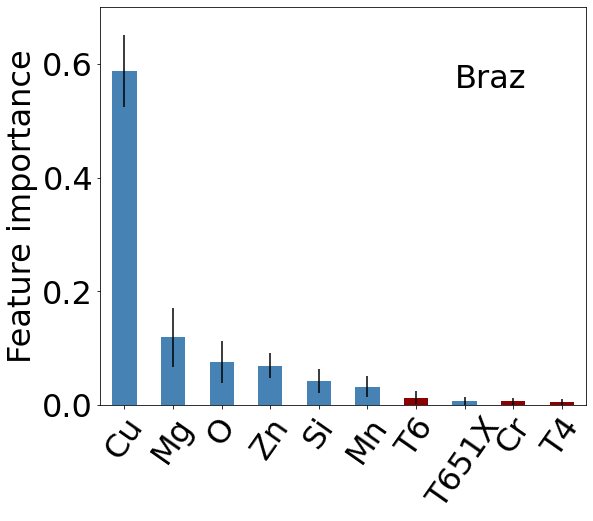

In [ ]:
######### 5         Shear/Braz

model = Model5
train_features = pd.DataFrame(train_features5, columns=feature_list)
train_labels = train_labels5
 
model.fit(train_features,train_labels)
# print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
importances = model.feature_importances_
std_importances = np.std([tree.feature_importances_ for tree in model.estimators_], axis=0)
std_importances = pd.Series(std_importances)
top_std = np.array(std_importances.nlargest(10))


feat_importances = pd.Series(importances, index=train_features.columns)
topfeatures = feat_importances.nlargest(10)


fig, ax = plt.subplots(figsize=(9,8))
colors = ['steelblue','steelblue','steelblue','steelblue','steelblue','steelblue','darkred','steelblue','darkred','darkred'] ### Braz
# colors = ['steelblue','steelblue','darkred','steelblue','steelblue','steelblue','darkred','darkred','steelblue','darkred'] ### Shear
topfeatures.plot.bar(yerr = top_std ,ax=ax, color = colors)
ax.set_ylabel('Feature importance')

fig.tight_layout()

# fig.text(0.8, 0.8, 'Shear', color='black', ha='center') 
fig.text(0.8, 0.8, 'Braz', color='black', ha='center') 

plt.xticks(rotation=55)
plt.rcParams['font.size'] = '32'
fig.tight_layout()

plt.ylim((0,0.7))


In [ ]:
FI_score_5 = pd.DataFrame(feat_importances)

(0.0, 0.7)

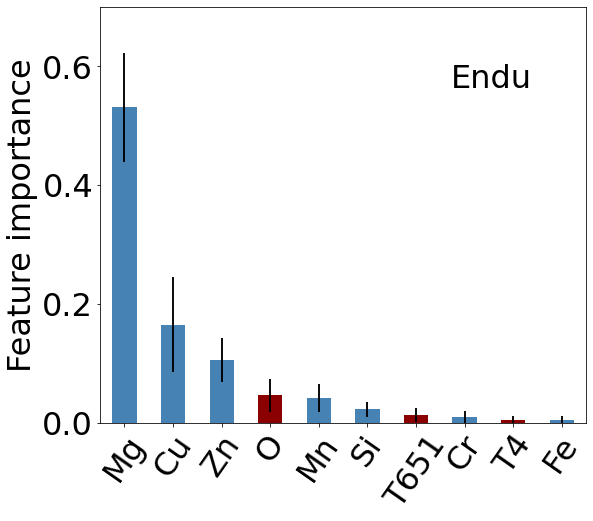

In [ ]:
######### 6            Endurance/GW

model = Model6
train_features = pd.DataFrame(train_features6, columns=feature_list)
train_labels = train_labels6
 
model.fit(train_features,train_labels)
# print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
importances = model.feature_importances_
std_importances = np.std([tree.feature_importances_ for tree in model.estimators_], axis=0)
std_importances = pd.Series(std_importances)
top_std = np.array(std_importances.nlargest(10))


feat_importances = pd.Series(importances, index=train_features.columns)
topfeatures = feat_importances.nlargest(10)


fig, ax = plt.subplots(figsize=(9,8))
topfeatures.plot.bar(yerr = top_std ,ax=ax)

# colors = ['steelblue','steelblue','steelblue','steelblue','steelblue','steelblue','steelblue','darkred','darkred','darkred'] ### GW
colors = ['steelblue','steelblue','steelblue','darkred','steelblue','steelblue','darkred','steelblue','darkred','steelblue'] ### Endurance
topfeatures.plot.bar(yerr = top_std ,ax=ax, color = colors)
ax.set_ylabel('Feature importance')
fig.tight_layout()

fig.text(0.8, 0.8, 'Endu', color='black', ha='center') 
# fig.text(0.8, 0.8, 'GW', color='black', ha='center') 

plt.xticks(rotation=55)
plt.rcParams['font.size'] = '32'
fig.tight_layout()

plt.ylim((0,0.7))



In [ ]:
FI_score_6 = pd.DataFrame(feat_importances)

(0.0, 0.7)

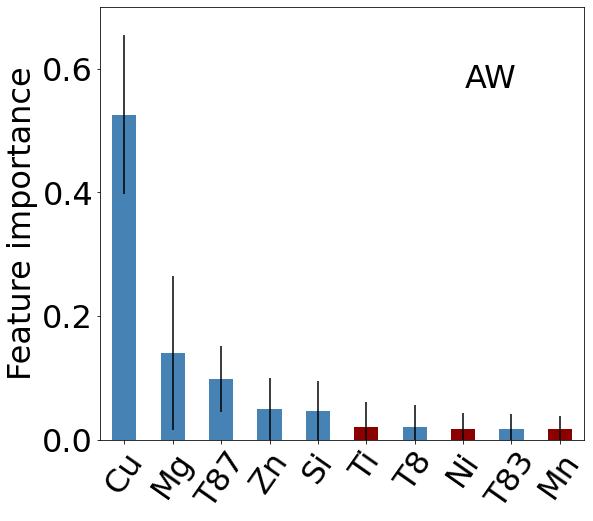

In [ ]:

######### 7      AW

model = Model7
train_features = pd.DataFrame(train_features7, columns=feature_list)
train_labels = train_labels7
 
model.fit(train_features,train_labels)
# print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
importances = model.feature_importances_
std_importances = np.std([tree.feature_importances_ for tree in model.estimators_], axis=0)
std_importances = pd.Series(std_importances)
top_std = np.array(std_importances.nlargest(10))


feat_importances = pd.Series(importances, index=train_features.columns)
topfeatures = feat_importances.nlargest(10)


fig, ax = plt.subplots(figsize=(9,8))
colors = ['steelblue','steelblue','steelblue','steelblue','steelblue','darkred','steelblue','darkred','steelblue','darkred'] ### AW
topfeatures.plot.bar(yerr = top_std ,ax=ax, color = colors)
ax.set_ylabel('Feature importance')

fig.tight_layout()


fig.text(0.8, 0.8, 'AW', color='black', ha='center')

plt.xticks(rotation=55)
plt.rcParams['font.size'] = '32'
fig.tight_layout()

plt.ylim((0,0.7))



In [ ]:
FI_score_7 = pd.DataFrame(feat_importances)

In [ ]:

######### 8 RSW

model = Model8
train_features = pd.DataFrame(train_features8, columns=feature_list)
train_labels = train_labels8
 
model.fit(train_features,train_labels)
# print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
importances = model.feature_importances_
std_importances = np.std([tree.feature_importances_ for tree in model.estimators_], axis=0)
std_importances = pd.Series(std_importances)
top_std = np.array(std_importances.nlargest(10))


feat_importances = pd.Series(importances, index=train_features.columns)
topfeatures = feat_importances.nlargest(10)


fig, ax = plt.subplots(figsize=(9,8))
colors = ['steelblue','darkred','steelblue','steelblue','steelblue','steelblue','steelblue','steelblue','darkred','steelblue'] ### RSW
topfeatures.plot.bar(yerr = top_std ,ax=ax, color = colors)
ax.set_ylabel('Feature importance')

fig.tight_layout()


fig.text(0.8, 0.8, 'RSW', color='black', ha='center') 


plt.xticks(rotation=55)
plt.rcParams['font.size'] = '32'
fig.tight_layout()

plt.ylim((0,0.6))



In [ ]:
FI_score_8 = pd.DataFrame(feat_importances)

In [ ]:

######### 9 Extr

model = Model9
train_features = pd.DataFrame(train_features9, columns=feature_list)
train_labels = train_labels9
 
model.fit(train_features,train_labels)
# print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
importances = model.feature_importances_
std_importances = np.std([tree.feature_importances_ for tree in model.estimators_], axis=0)
std_importances = pd.Series(std_importances)
top_std = np.array(std_importances.nlargest(10))


feat_importances = pd.Series(importances, index=train_features.columns)
topfeatures = feat_importances.nlargest(10)


fig, ax = plt.subplots(figsize=(9,8))
colors = ['steelblue','steelblue','steelblue','steelblue','steelblue','steelblue','darkred','darkred','steelblue','steelblue'] ### Extr
topfeatures.plot.bar(yerr = top_std ,ax=ax, color = colors)
ax.set_ylabel('Feature importance')
fig.tight_layout()


fig.text(0.8, 0.8, 'Extr', color='black', ha='center') 


plt.xticks(rotation=55)
plt.rcParams['font.size'] = '32'
fig.tight_layout()

plt.ylim((0,0.6))



In [ ]:
FI_score_9 = pd.DataFrame(feat_importances)

In [ ]:
Mech_scores = pd.concat([FI_score_1, FI_score_2, FI_score_3, FI_score_4, FI_score_5, FI_score_6], axis=1)

Mech_scores.to_excel(r'/content/drive/My Drive/Yasaman_projects/Materials_Research/Experiments/Outputs/Mech_scores.xlsx', index = True)

In [ ]:
tech_scores = pd.concat([FI_score_1, FI_score_2, FI_score_3, FI_score_4, FI_score_5, FI_score_6, FI_score_7, FI_score_8, FI_score_9], axis=1)

tech_scores.to_excel(r'/content/drive/My Drive/Yasaman_projects/Materials_Research/Experiments/Outputs/tech_scores.xlsx', index = True)